<a href="https://colab.research.google.com/github/Esteban-Caldera/Programaci-n-Avanzada/blob/main/U2A4.%20NOOTEBOOK%3A%20An%C3%A1lisis%20de%20Datos%20Aplicables%20a%20Regresi%C3%B3n%20Lineal%20Simple/Regresi%C3%B3n_lineal_Autos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis de Datos Aplicables a Regresión Lineal Simple

En un deleer de autos se quiere conocer la relacion que existe entre el Kilometraje de una camioneta con el precio al momento de su venta, para hacer esto es necesario realizar una regresion lineal para conocer la relacion que existe.
NOTA: Con este metodo tambien se puede conocer el año y el precio.
Sacado de: https://www.kaggle.com/datasets/asinow/car-price-dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Cargar el Dataset Car Price
df = pd.read_csv("car_price_dataset (1).csv")


In [3]:
df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [4]:
# Descripción del dataset
print("Información del dataset:")
print(df.info())
print("\nDescripción estadística:")
print(df.describe())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB
None

Descripción estadística:
               Year   Engine_Size        Mileage         Doors   Owner_Count  \
count  10000.000000  10000.000000   10000.000000  10000.000000  10000.000000   
mean    2011.543700      3.000560  149239.111800      3.497100      2.991100   
std        6.897

In [5]:
# Seleccionar las variables de interés
df = df[['Mileage', 'Price' , 'Year']]

In [6]:
# Eliminar valores nulos
df = df.dropna()
df

,Mileage,Price,Year
0,289944,8501,2020
1,5356,12092,2012
2,231440,11171,2020
3,160971,11780,2023
4,286618,2867,2003
...,...,...,...
9995,5794,8884,2004
9996,168000,6240,2002
9997,86664,9866,2010
9998,225772,4084,2002


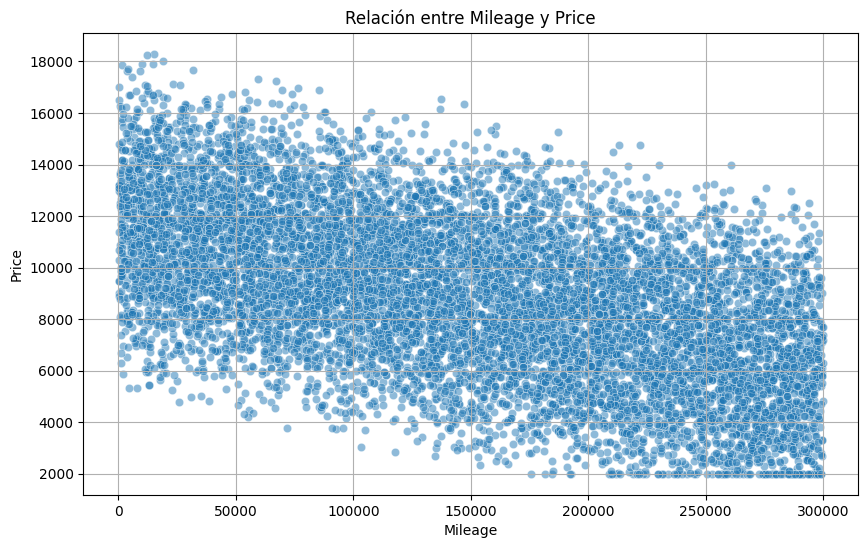

La correlación entre Mileage y Price es: -0.5512271827629014


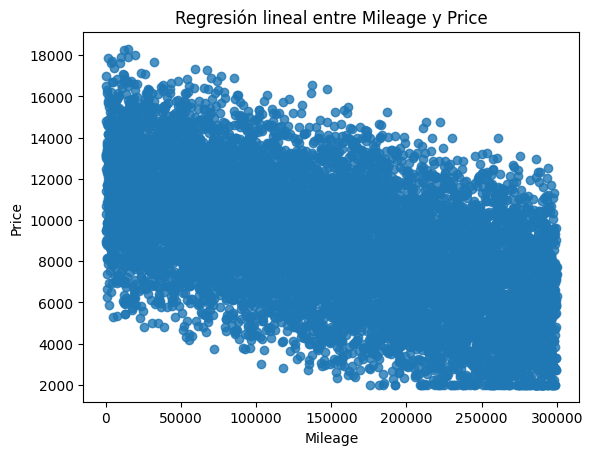

In [7]:


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='Price', data=df, alpha=0.5)  # alpha para transparencia
plt.title('Relación entre Mileage y Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Calcular la correlación entre Mileage y Price
correlation = df['Mileage'].corr(df['Price'])
print(f"La correlación entre Mileage y Price es: {correlation}")

# Crear un diagrama de regresión lineal
sns.regplot(x='Mileage', y='Price', data=df)
plt.title('Regresión lineal entre Mileage y Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()


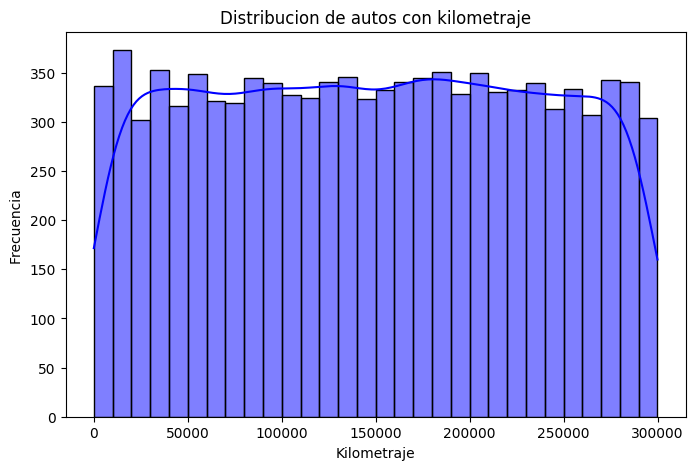

In [8]:
# Visualización de la relación entre Kilometraje y Precio
plt.figure(figsize=(8,5))
sns.histplot(df["Mileage"], bins=30, kde=True, color="blue")

plt.xlabel("Kilometraje")
plt.ylabel("Frecuencia ")
plt.title("Distribucion de autos con kilometraje")
plt.show()

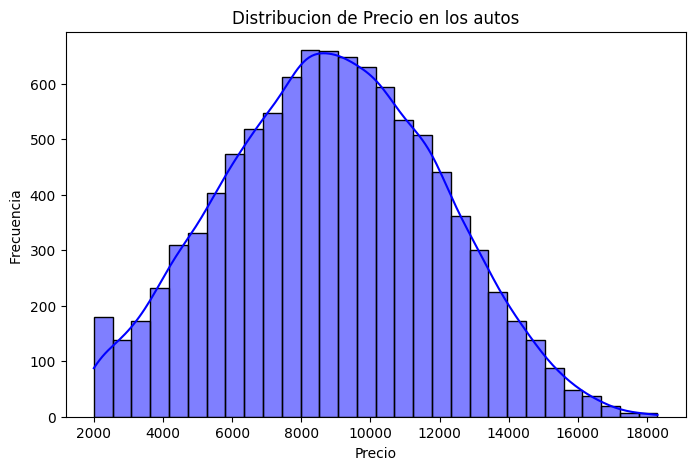

In [10]:
# Visualización de la relación entre Kilometraje y Precio
plt.figure(figsize=(8,5))
sns.histplot(df["Price"], bins=30, kde=True, color="blue")

plt.xlabel("Precio")
plt.ylabel("Frecuencia ")
plt.title("Distribucion de Precio en los autos")
plt.show()


Matriz de correlación:
          Mileage     Price      Year
Mileage  1.000000 -0.551227 -0.002476
Price   -0.551227  1.000000  0.663036
Year    -0.002476  0.663036  1.000000


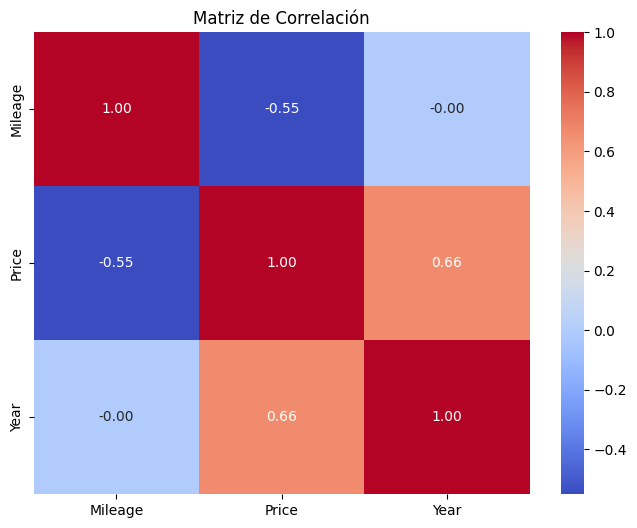

In [11]:

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print("\nMatriz de correlación:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


In [12]:
# Dividir en conjunto de entrenamiento y prueba
X = df[['Mileage']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [14]:
# Coeficientes del modelo
print(f"Intercepto: {model.intercept_}")
print(f"Coeficiente: {model.coef_[0]}")

Intercepto: 11809.257878302735
Coeficiente: -0.01993960651805303


In [23]:
# Predicciones
y_pred = model.predict(X_test)

In [24]:
# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")


Error cuadrático medio (MSE): 6413212.319091444
Coeficiente de determinación (R^2): 0.3019869774558347


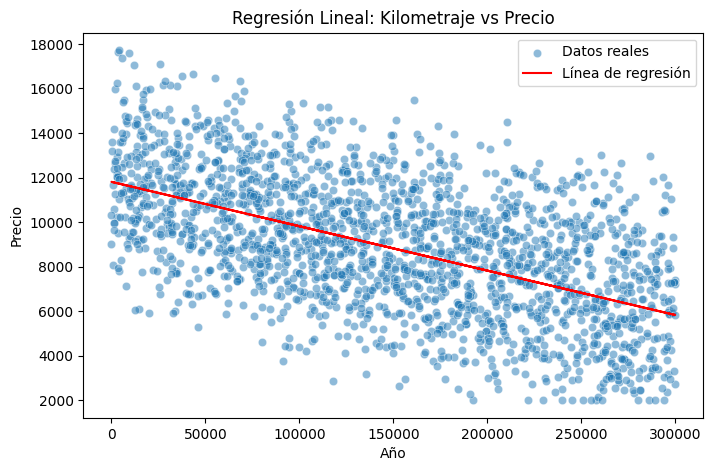

In [25]:
# Gráfico con la línea de regresión
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_test['Mileage'], y=y_test, label='Datos reales', alpha=0.5)
plt.plot(X_test, y_pred, color='red', label='Línea de regresión')
plt.xlabel("Año")
plt.ylabel("Precio")
plt.title("Regresión Lineal: Kilometraje vs Precio")
plt.legend()
plt.show()

In [26]:

print("\n--- Key Statistics ---")
print(f"Correlation between Mileage and Price: {correlation}")
print(f"\n--- Model Coefficients ---")
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")
print("\n--- Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")

print("\n--- Sample Predictions ---")
# Print a few sample predictions
for i in range(5):  # Print the first 5 predictions
    print(f"Mileage: {X_test.iloc[i, 0]}, Predicted Price: {y_pred[i]}, Actual Price: {y_test.iloc[i]}")



--- Key Statistics ---
Correlation between Mileage and Price: -0.5512271827629014

--- Model Coefficients ---
Intercept: 11809.257878302735
Coefficient: -0.01993960651805303

--- Model Evaluation ---
Mean Squared Error (MSE): 6413212.319091444
R-squared (R^2): 0.3019869774558347

--- Sample Predictions ---
Mileage: 257760, Predicted Price: 6669.624902209386, Actual Price: 2000
Mileage: 111790, Predicted Price: 9580.209265649586, Actual Price: 11164
Mileage: 13473, Predicted Price: 11540.611559685007, Actual Price: 14630
Mileage: 133298, Predicted Price: 9151.348208659303, Actual Price: 7334
Mileage: 18611, Predicted Price: 11438.16186139525, Actual Price: 10127
